# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнила студентка гр. 9383 Лапина Анастасия, вариант 96.

## Цель работы:
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

# Основные теоретические положения

### Бинарный метод

Основной идеей данного метода является разбиение искомого числа ${x^n}$ на произведение ${x}$ в некоторых степенях. Результат считается по следующим правилам:

Слева направо просматривается бинарная запись числа ${n}$ без первого бита. Пускай результ будет храниться в переменной ${t}$, которая изначально равняется ${x}$.

Если текущий бит - это ${1}$, то число возводится в квадрат, а полученное число затем еще раз умножается на ${x}$. 

Если текущий бит - это ${0}$, то число возводится в квадрат.
Количество операций умножения при использовании данного метода равно ${\lambda (n) + \nu (n) - 1}$, где ${\lambda (n) = \left \lfloor lb(n) \right \rfloor}$, а ${\nu(n)}$ - вес Хэмминга для бинарного представления числа ${n}$, то есть число ненулевых битов в двоичной записи числа

### Метод множителей

Этот метод базируется на бинарном методе. Дано число ${x}$ и степень ${n}$, в которую это число предстоит возвести. Рассматриваем делители числа n, например, $n = a*b$, при этом $x^n =(x^a)^b$ . Тогда считаем $x^a$ бинарным методом,  затем, делаем замену $y = x^a$, и считаем $y^b$.

### Аддитивная цепочка

Аддитивная цепочка — это последовательность натуральных чисел ${a_0, a_1, a_2, ..., a_m = n}$, в которой первый элемент всегда равен ${1}$, а каждый последующий элемент является суммой каких-то двух предшествующих элементов (возможно, одинаковых - удвоение). То есть:

${a_0 = 1}$

${\forall i > 0, a_i = a_j + a_k , j,k < i}$ - шаг аддитивной цепочки.

Существуют следующие шаги:

1) ${i}$-шаг - удвоение, если ${j = k = i - 1}$

2) ${i}$-шаг - звездный, если ${j = i - 1}$, ${k = \overline{0 .. (i-1)}}$

3) ${i}$-шаг - малый, если ${\lambda(a_i) = \lambda(a_{i-1})}$

### Алгоритм Яо для вычисления приближённых аддитивных цепочек

Цепочка Яо - аддитивная цепочка, состаящая из 2 аддитивных цепочек, первая цепочка равна $Y_k(n):1,2,4,\ ...\, 2^{\lambda (n)}$, вторая аддитивная цепочка составляется на основе первой. $d(z)$ - сумму всех разрядов, цифра которых равняется z.

Алгоритм Яо составляет для числа $n\in N$ цепочку Яо. Сначала алгоритму подается число $n\in N$ и $k\in N$. Далее алгоритм разбивает число на сумму: $\sum_{i=0}^{2^k-1}{2^{ik}a_i}$, где $a_i$ - цифра i-го разряда числа. Потом алгоритм считает $zd(z)$ для всех чисел от 1 до $2^k-1$. $zd(z)$ получается с помощью сложения чисел из $Y_k(n)$. Наконец сложением всех $d(z)$ получаем нужное нам число n. Все промежуточные значения записывются во вторую аддитивную цепочку цепочки Яо.

### Звездная цепочка.

Звездная цепочка - это аддитивная цепочка, включающая только звездные шаги.


### Алгоритм дробления вектора индексов

Данный алгоритм находит минимальную звездную цепочку для числа ${n}$.

Пусть у нас есть звездная цепочка длины ${l(n) = m-1}$ Тогда для каждой такой звездной цепочки можно задать вектор индексов вида ${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leq x \leq i\right\}}$. Тогда можно записать наш шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Для поиска минимальной звездной цепочки осуществим перебор. Если осуществлять его в лоб, то число операций будет равно ${(m-1)!}$, что предельно много. Для уменьшения числа операций разделим наш вектор индексов на две части - фиксированную и менящийся остаток: ${\left\{r_i\right\}_{i=1}^q \cup \left\{\rho_i\right\}_{j=q+1}^m}$, где ${\rho_{j} = \left\{ x : 1 \leq x \leq j \right\}}$.

Заметим также, что наибольший ${a_m}$ будет получаться в цепочке ${\left\{r_i\right\}_{i=1}^q \cup \left\{q+1, q+2, ..., m\right\}}$, а наименьший ${\left\{r_i\right\}_{i=1}^q \cup \left\{1, 1,..., 1\right\}}$. Соответственно, получаем формулы:

${a_{min} = a_{q+1} + m - q}$
${a_{max} = a_{q+1} \cdot 2^{m-q}}$
В итоге алгоритм выглядит следующим образом: будем рассматривать аддитивные цепочки с длиной ${m}$, где ${\underline{l}(n) \leq m \leq \bar{l}(n)}$, при этом ${\underline{l}(n) = \lfloor lb(n) \rfloor}$ и ${\bar{l}(n) = \lambda(n) + \nu(n) - 1}$. Выберем целое ${q: 1 \leq q \leq m - 1}$. Пусть ${q}$ будет ${\frac{n}{2}}$. Затем переберем все векторы индексов ${\left\{r_i\right\}_{i=1}^q}$ - всего шагов будет ${q!}$ штук, на каждом шаге строим звездную цепочку и вычисляем ${a_{min}}$ и ${a_{max}}$.

Если ${a_m = n}$, то задача решена
Если ${n \notin [a_{min}, a_{max}]}$, то переходим к следующему набору ${\left\{r_i\right\}}$.
Если ${n \in [a_{min}, a_{max}]}$, то начинаем перебирать меняющийся кусок вектора индексов ${\left\{\rho_i\right\}_{j=q+1}^m}$. Всего их ${\frac{m!}{q!}}$. Строим звездные цепочки.
Если для построенных звездных цепочек ${a_m = n}$, то задача решена.
Если все ${\left\{\rho_i\right\}}$ просмотрены, то переходим к следующему набору ${\left\{r_i\right\}}$.
Если дошли до ${\left\{1,1,...,1\right\}\cup\left\{1,1,...,1\right\}}$, то есть не нашли такую цепочку, в которой ${a_m = n}$, то увеличиваем m на ${1}$ и начинаем перебор сначала.

### Теорема Брауэра и ее следствия

При некотором ${k < lb(lb(n))}$ справедливо следующее неравенство ${l(n) < (1 + k^{-1})\left \lceil lb(n) \right \rceil + 2^{k-1} - k + 2}$.  

#### Следствие 1.
Если ${k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))}$, то ${\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1}$

#### Следствие 2. 
Наименьшая верхняя оценка: ${\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{\mathcal{O}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^2}}$

### Гипотеза Шольца-Брауэра

Гипотеза Шольца-Брауэра заключается в следующем: ${l^*(2^n-1) \leq l^*(n)+n-1}$

# Постановка задачи


Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.


# Порядок выполнения работы

1) Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2) Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3) Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4) Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5) Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.

6) Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

### Выполнение работы

### 1.Бинарный метод и метод множителей

Рассмотрим n = 40, 63, 65
#### 1) для n = 40:
 
#####    a) Бинарный метод
    40 =  101000 = УКУККК
$x; x*x = x^2; x^2*x^2 = x^4; x^4*x = x^5; x^5*x^5 = x^{10}; x^{10}*x^{10} = x^{20}; x^{20}*x^{20} = x^{40};$

    Количество операций: 5+2-1 = 6
#####    b) Метод множителей
    40 = 5*8
   $x^5$:
   
   $x; x*x = x^2; x^2*x^2 = x^4; x^4*x = x^5$
        
   Пусть $x^5 = y;$
   $y^8:$
  $ y; y*y = y^2; y^2*y*2 = y^4; y^4*y^4 = y^8;$
  
    Количество операций: 6
    
#### 2) для n = 63:
 
#####    a) Бинарный метод
    63 =  111111 = КУКУКУКУКУКУ
  $ x; x*x = x^2; x^2*x = x^3; x^3*x^3 = x^6; x^6*x = x^7; x^7*x^7 = x^{14}; x^{14}*x = x^{15}; x^{15}*x^{15} = x^{30}; x^{30}*x = x^{31}; x^{31}*x^{31} = x^{62}; x^{62}*x = x^{63};$
  
    Количество операций: 5+6-1 = 10
#####    b) Метод множителей
    63 = 7*9
   $x^7:$
   
   $x; x*x = x^2; x^2*x^2 = x^4; x^4*x = x^5; x^5*x = x^6; x^6*x = x^7$
   
   Пусть $x^7 = y;$
   
   $y^9:$
   
   $y; y*y = y^2; y^2*y*2 = y^4; y^4*y^4 = y^8; y^8*y = y^9$
   
    Количество операций: 8
    
#### 3) для n = 65:
 
#####    a) Бинарный метод
    65 =  1000001 = ККККККУ
$x; x*x = x^2; x^2*x^2 = x^4; x^4*x^4 = x^8; x^8*x^8 = x^{16}; x^{16}*x^{16} = x^{32}; x^{32}*x^{32} = x^{64}; x^{64}*x = x^{65};$ 

    Количество операций: 6+2-1 = 7
#####    b) Метод множителей

    65 = 5*13

$x^5$:

$x; x*x = x^2; x^2* x^2 = x^4; x^4*x = x^5;$ 
   
Пусть $x^5 = y;$

$y^{13}:$
   
$y; y*y = y^2; y^2*y = y^3; y^3*y^3 = y^6; y^6*y^6 = y^{12}; y^{12}*y = y*{13}; $
   
    Количество операций: 8
    

### Вывод

Выбирать использование бинарного метода или метода множителей следует исходя из числа n. Если число n ближе к $2^k-1$, где $k \in N$, то стоит воспользоваться методом множителей. А если число n ближе к $2^k+1$, где $k \in N$, то лучше применить бинарный метод.


### 2. Алгоритм Яо

Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k.

In [30]:
import math

def yao(n, k):
    print("n = ", n, "\tk = ", k)
    result = []
    for i in range(int(math.log2(n))+1):
        result.append(2^i)
    d = 2^k
    #переводим число в систему счисления = d
    new_num = []  #будем хранить число в перевернутом виде - на [0] - последняя цифра
    old_num = n
    while old_num > 0:
        new_num.append(old_num % d)
        old_num //= d
    cur = []
    for j in (range(d)):
        x = j
        count = 0
        z = 0
        for i in (range(len(new_num))):
            if (new_num[i]==x):
                count = count + d^i  
                #print("count ", count)
        cur = []
        if ((j>0) and (count!=0)):
            #cur = []
            for i in (range (int(math.log2(j)+1))):
                cur.append(count * 2^(i))
            if(cur[-1]==j*count):
                for i in range(len(cur)):
                    result.append(cur[i])
                continue
        
            x = x - 2^(int(math.log2(j)))
            while (x!=0):
                if ((x//2)!=0):
                    check = 0
                    for ind in (range(len(cur)-1)):
                        if (cur[ind]+cur[-1] == count*j):
                            cur.append(count*j)
                            x = 0
                            check = 1
                    if (check==0):   
                        cur.append(cur[0]^(x//2)+cur[-1])
                        x = x - x//2
                else:
                    cur.append(cur[-1]+cur[0])
                    x = 0
                
        if (len(cur) > 0):
            for i in range(len(cur)):
                result.append(cur[i])
    if (result[-1]!=n):
        result.append(n)
    print(result)
    
    print("-------------------------------------------------------------------------------------------------------------------------------")

n = [17, 52, 65, 621, 27182]

k = [2, 3, 4]

for i in (range(len(n))):
    for j in (range(len(k))):
        yao(n[i], k[j])
        

n =  17 	k =  2
[1, 2, 4, 8, 16, 17]
-------------------------------------------------------------------------------------------------------------------------------
n =  17 	k =  3
[1, 2, 4, 8, 16, 1, 8, 16, 17]
-------------------------------------------------------------------------------------------------------------------------------
n =  17 	k =  4
[1, 2, 4, 8, 16, 17]
-------------------------------------------------------------------------------------------------------------------------------
n =  52 	k =  2
[1, 2, 4, 8, 16, 32, 4, 16, 32, 48, 52]
-------------------------------------------------------------------------------------------------------------------------------
n =  52 	k =  3
[1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32, 48, 52]
-------------------------------------------------------------------------------------------------------------------------------
n =  52 	k =  4
[1, 2, 4, 8, 16, 32, 16, 32, 48, 1, 2, 4, 52]
--------------------------------------------------------

В данной таблице показаны результаты работы алгоритма Яо:
   
   
|n	   | k = 2 | k = 3 | k = 4 |
| :-:  | :---: | :---: | :---: |
|17    | 6     |   9   |   6   |
|52    | 11    |  14   |  13   |
|65    | 8     |  8    |   12  |
|621   | 17    |  16   |   23  |
|27182 |  22   | 24    |  33   |


#### Вывод:

Алгоритм Яо хорошо работает для небольших чисел. Но для больших чисел алгоритм не оптимален, лучше выбрать другой метод.



### 3. Алгоритм дробления вектора индексов

Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

In [1]:
import time

import math

def build_chain(r_i, ro_i):
    q = len(r_i)
    result_chain = [1]
    for i in r_i:
        result_chain.append(result_chain[-1] + result_chain[i - 1])
    for i in ro_i:
        result_chain.append(result_chain[-1] + result_chain[i - 1])
    return result_chain
    
def change_chain(ind_vec, start_index):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if (ind_vec[-i] > cur_max_index):
            if (i == len(ind_vec)):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break
    
def algorithm(n):
    counter = 0
    m = int(math.log2(n))
    #print(m)
    l_up = m + bin(n).count('1') - 1   #сложность бинарного метода - верхняя граница
    if (m == math.log2(n)): #оптимизация для чисел n = 2^x
        result_chain = [1]
        for i in range(int(math.log2(n))):
            result_chain.append(result_chain[-1] * 2)
        return result_chain
    while (m <= l_up): #1 - внешний цикл
        q = int(m/2) #для 3
        if (q == 0):
            q = 1
        r_i = [1 for i in range(q)]
        while (len(r_i) == q):
            ro_i = [1 for i in range(m - q)]
            result_chain = build_chain(r_i, ro_i)
            if (result_chain[-1] == n): #2а выходим
                return result_chain
            a_max = result_chain[q] * 2 ** (m - q)
            a_min = result_chain[q] + m - q
            
            if (n < a_min or n > a_max):   #2в меняем вектор r_i, тк не попал в промежуток
                change_chain(r_i, 1)
                continue
            
            while (len(ro_i) == m - q): #2с внутренний цикл перебора
                result_chain = build_chain(r_i, ro_i)
                if (result_chain[-1] == n): #2d
                    return result_chain
                change_chain(ro_i, q + 1)
            change_chain(r_i, 1)

        m += 1 #3 если не нашли, то в начало

n = int(input("Введите n: "))
start = time.time()
result_chain = algorithm(n)
finish = time.time()
print("Время:", finish - start, "секунд")
print("Аддитивная цепочка:", result_chain)
print("Длина аддитивной цепочки:", len(result_chain))

Введите n: 15
Время: 0.042914628982543945 секунд
Аддитивная цепочка: [1, 2, 3, 5, 10, 15]
Длина аддитивной цепочки: 6


#### Тестирование алгоритмома дробления вектора индексов:

Для n = 501: Длина = 13, Время = 1638.4883134365082 секунд, Цепочка = [1, 2, 3, 4, 7, 10, 20, 40, 80, 87, 167, 334, 501]

Для n = 507: Длина = 13, Время = 1853.99551820755 секунд, Цепочка = [1, 2, 3, 4, 7, 14, 21, 42, 63, 126, 252, 255, 507]

Для n = 621: Длина = 13, Время = 2074.5186326503754 секунд, Цепочка = [1, 2, 3, 5, 8, 16, 32, 37, 69, 138, 207, 414, 621]

#### Сравнение длины цепочки с бинарным методом, методом множителей и алгоритмом Яо:


При n = 501: Алгоритм дробления индексов = 13	Алгоритм Яо = 14	Бинарный метод = 14	Метом множителей = 13

При n = 507: Алгоритм дробления индексов = 13	Алгоритм Яо = 16	Бинарный метод = 15	Метом множителей = 13

При n = 621: Алгоритм дробления индексов = 13	Алгоритм Яо = 17	Бинарный метод = 14	Метом множителей = 13

#### Вывод

Алгоритм дробления вектором интексов при n>500 работает очень медленно, поэтому требуется очень много времени. Для нахождения цепочки лучше всего работает метод множителей, а хуже всех бинарный метод.  Алгоритм дробления вектора индексов хорош для вычисления цепочки, однако если требуется находить быстро, то лучше выбрать метод множителей.

### 4. Проверка следствия теоремы Брауэра

Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

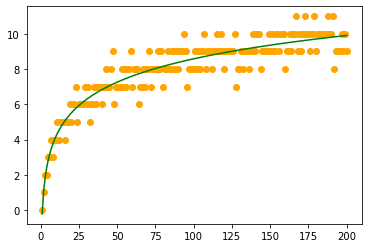

In [89]:

import matplotlib.pyplot as plt

def graph(x, y):
    sum_ln2 = sum([float((log(i))**2) for i in x])
    sum_ln = sum([float(log(i)) for i in x])
    
    v_1 = sum([float(y[i] * log(x[i])) for i in range(len(x))])
    v_2 = sum(y)
    
    b = (sum_ln2*v_2 - sum_ln*v_1)/(sum_ln2*200 - sum_ln**2)
    a = (v_1 - sum_ln*b)/sum_ln2
    #print(a)
    #print(b)
    plt.plot(x, [a * log(i) + b for i in x], color = 'green')
    
length_chain = [0]  #для координаты по у
n = 200
for i in range(2, n+1):
    q = factor(i)[0][0] #берет минимальный делитель
    if (q == i):
        length_chain.append(length_chain[-1] + 1) #если число простое
    else:
        length_chain.append(min(length_chain[-1] + 1, length_chain[q - 1] + length_chain[i/q - 1]))
        
plt.scatter(for_x, length_chain, color='orange')   #l(n)
graph(for_x, length_chain)   #апрокс кривая

#### Вывод

По построенным графикам можно сделать вывод, что ${l(n)}$ аппроксимируется логарифмической кривой. Значит, ${l(n)}$ и ${\lambda(n)}$ ведут себя на бесконечности одинаково. Следствие 1 из теоремы Брауэра $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
 проверено.

### 5. Проверка гипотезы Шольца–Брауэра

Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.  $l^*(2^n-1) \geq l^*(n)+n-1$, в данной задаче обозначим за a = $l^*(2^n-1)$, b = $l^*(n)+n-1$

In [1]:
import math

def build_chain(r_i, ro_i):
    q = len(r_i)
    result_chain = [1]
    for i in r_i:
        result_chain.append(result_chain[-1] + result_chain[i - 1])
    for i in ro_i:
        result_chain.append(result_chain[-1] + result_chain[i - 1])
    return result_chain
    
def change_chain(ind_vec, start_index):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if (ind_vec[-i] > cur_max_index):
            if (i == len(ind_vec)):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break
    
def algorithm(n):
    counter = 0
    m = int(math.log2(n))
    #print(m)
    l_up = m + bin(n).count('1') - 1   #сложность бинарного метода - верхняя граница
    if (m == math.log2(n)): #оптимизация для чисел n = 2^x
        result_chain = [1]
        for i in range(int(math.log2(n))):
            result_chain.append(result_chain[-1] * 2)
        return result_chain
    while (m <= l_up): #1 - внешний цикл
        q = int(m/2) #для 3
        if (q == 0):
            q = 1
        r_i = [1 for i in range(q)]
        while (len(r_i) == q):
            ro_i = [1 for i in range(m - q)]
            result_chain = build_chain(r_i, ro_i)
            if (result_chain[-1] == n): #2а выходим
                return result_chain
            a_max = result_chain[q] * 2 ** (m - q)
            a_min = result_chain[q] + m - q
            
            if (n < a_min or n > a_max):   #2в меняем вектор r_i, тк не попал в промежуток
                change_chain(r_i, 1)
                continue
            
            while (len(ro_i) == m - q): #2с внутренний цикл перебора
                #print(ro_i)
                result_chain = build_chain(r_i, ro_i)
                if (result_chain[-1] == n): #2d
                    return result_chain
                change_chain(ro_i, q + 1)
            change_chain(r_i, 1)

        m += 1 #3 если не нашли, то в начало

for n in range(2, 11):
    a = len(algorithm(2 ** n -  1))
    b = len(algorithm(n)) + n - 1
    print("n=", n, ": ", a, " <= ", b)

n= 2 :  3  <=  3
n= 3 :  5  <=  5
n= 4 :  6  <=  6
n= 5 :  8  <=  8
n= 6 :  9  <=  9
n= 7 :  11  <=  11
n= 8 :  11  <=  11
n= 9 :  13  <=  13
n= 10 :  14  <=  14


В данной таблице показаны результаты проверки гипотезы:
   
   
|n	   | $l^*(2^n-1)$ |    $l^*(n) + n - 1$  |
| :-:  | :----------: | :------------------: |
|2	   | 3            |  3                   |
|3	   | 5	          |  5                   |
|4 	   | 6	          |  6                   |
|5	   | 8            |  8                   |
|6	   | 9	          |  9                   |
|7 	   | 11	          |  11                  | 
|8	   | 11	          |  11                  |
|9	   | 13	          |  13                  | 
|10	   | 14	          |  14                  |

#### Вывод

Анализируя данные из вышепредставленной таблицы, можно сделать вывод о том, что гипотеза Шольца-Брауэра верна для ${2 \leq n \leq 10}$

### Общий вывод по проделанной работе

В ходе работы были изучены и применены на практике теоретические сведения об аддитивных цепочках и об алгоритмах нахождения аддитивных цепочек для заданного числа. Были реализованы бинарный метод, метод множителей, алгоритм Брауэра и алгоритм дробления вектора индексов, который работает медленнее вышеописанных, но гарантированно выводит минимально возможную цепочку для заданного числа. Также в ходе работы были проверены на практике следствие 1 из теоремы Брауэра и гипотеза Шольца-Брауэра.